In [127]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [128]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [129]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 음수 부호 출력

- 데이터 빈도(히스토그램, 박스플롯)
- 데이터 전처리
- 변수 검토
- 변수간 관계 분석 및 시각화

In [130]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

In [131]:
xls = pd.ExcelFile('C:/Users/i/data/koweps_visualization.xlsx')

In [132]:
koweps_df = xls.parse(xls.sheet_names[0])

In [133]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


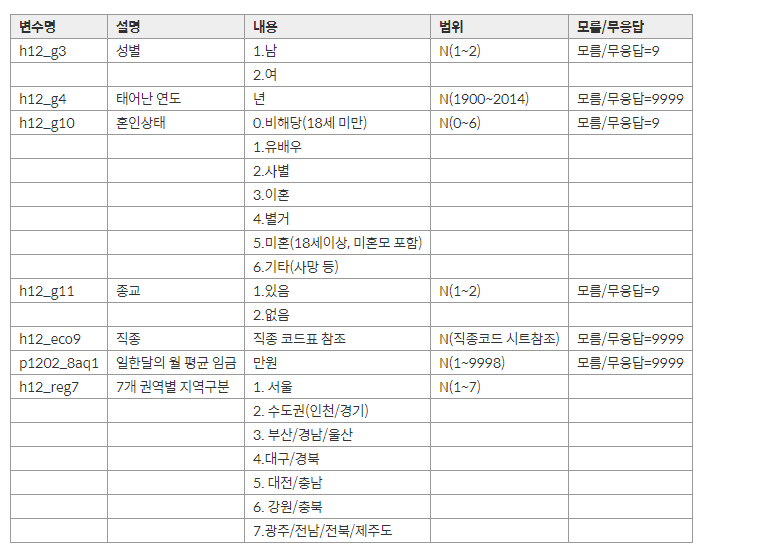

In [134]:
from IPython.display import Image
Image('C:/Users/i/data/koweps_img.png', width = 700)

In [135]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [136]:
# 1. 해당 데이터 프레임에서 제공한 컬럼들만 추출하여 사용하고자 하는 컬럼들만 rename 하라.

data = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
data.head()

,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [137]:
data.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


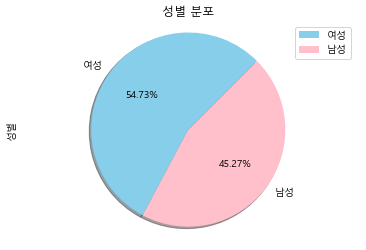

In [138]:
# 데이터 분석
# 성별 데이터 분포 확인
# 성별을 비율 순으로 정렬
# 데이터 시각화

data_gender = data['성별'].value_counts()
data_gender.plot.pie(autopct='%.2f%%',
                     startangle=45,
                     legend=True,
                     shadow=True,
                     labels=['여성', '남성'],
                          colors=['skyblue', 'pink'])
plt.axis('equal')
plt.title('성별 분포')
plt.show()

# 파이 차트는 시리즈 형식만 가능

In [139]:
# 성별 추출
gender_filter_df = data.filter(['성별'])
gender_filter_df.head()

,성별
0,2
1,2
2,1
3,1
4,2


In [140]:
# 성별값을 남, 여로 변경하라
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자') 
#논리적인 조건을 주는 함수 where( 논리식, 맞을 때 리턴값. 그렇지 않을 때 리턴값)
gender_filter_df.head()

,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


In [141]:
# 결측값 확인
gender_filter_df.isna().sum()

성별     0
성별2    0
dtype: int64

In [142]:
# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
gender_count

여자    8440
남자    6982
Name: 성별2, dtype: int64

In [143]:
# 시리즈를 데이터 프레임으로 변환
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.head()

,성별2
여자,8440
남자,6982


In [144]:
gender_count_df.rename(columns = {'성별2' : '명'} , inplace=True)
gender_count_df

,명
여자,8440
남자,6982


In [145]:
# 비율순으로 정렬
gender_count_df.sort_values('명', inplace=True)
gender_count_df

,명
남자,6982
여자,8440


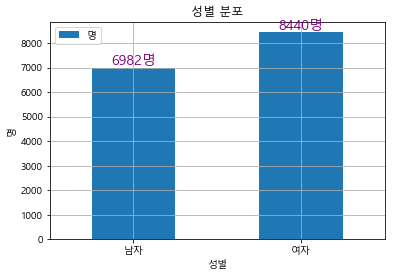

In [146]:
# 성별 분포를 시각화
gender_count_df.plot.bar(rot=0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list(gender_count_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, 
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=14,
             color='purple')

plt.show()

### [실습] 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자로 변환
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(성별로 그룹화해 그룹별 평균)
- 데이터 시각화

In [147]:
data.head()

# 성별과 월급 데이터만 추출
gender_wage = data[['성별', '일한달의 월 평균 임금']]
gender_wage.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [148]:
# 성별을 남자와 여자로 변환
gender_wage['성별'] = np.where(gender_wage['성별'] == 1, '남자', '여자')
gender_wage.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [149]:
# 데이터 정제(결측값 확인, 결측값 제거)
gender_wage.isna().sum()
gender_wage_dropna = gender_wage['일한달의 월 평균 임금'].dropna()
gender_wage_dropna.isna().sum()

0

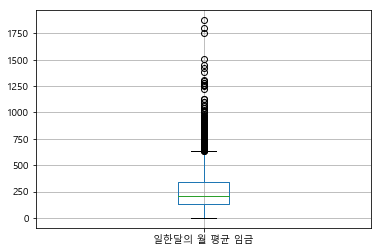

In [150]:
# 이상치 결측 처리를 위한 데이터프레임 생성
outlier_df = pd.DataFrame(gender_wage_dropna)
outlier_df.boxplot()

In [151]:
# 3사분위 정보
quantile75 = outlier_df.quantile(q=0.75)
quantile75

일한달의 월 평균 임금    336.0
Name: 0.75, dtype: float64

In [152]:
# 1사분위 정보
quantile25 = outlier_df.quantile(q=0.25)
quantile25

일한달의 월 평균 임금    135.0
Name: 0.25, dtype: float64

In [153]:
# IQR (3사분위 수 - 1사분위 수)
iqr = quantile75 - quantile25
iqr

일한달의 월 평균 임금    201.0
dtype: float64

In [154]:
# 최저 한계치(lower fence)
lower_fence = quantile25 - 1.5 * iqr
print('lower_fence\n' , lower_fence) # \n은 개행, 아랫줄로 내린다.

# 최고 한계치(upper fence)
upper_fence = quantile75 + 1.5 * iqr
print('upper_fence\n' , upper_fence)

lower_fence
 일한달의 월 평균 임금   -166.5
dtype: float64
upper_fence
 일한달의 월 평균 임금    637.5
dtype: float64


In [155]:
# outlier_df 
# 극단치 경계 값을 얻어보자 (아래 수평선)
lower_outlier = outlier_df[outlier_df > lower_fence].min()
lower_outlier

일한달의 월 평균 임금    0.0
dtype: float64

In [156]:
# 극단치 경계 값을 얻어보자 (위 수평선)
upper_outlier = outlier_df[ outlier_df < upper_fence ].max()
upper_outlier

일한달의 월 평균 임금    634.0
dtype: float64

In [157]:
# 이상치 추출
outlier = outlier_df[outlier_df['일한달의 월 평균 임금'] > upper_outlier['일한달의 월 평균 임금']]
outlier.head()

,일한달의 월 평균 임금
76,841.0
80,691.0
133,1800.0
175,693.0
244,758.0


In [158]:
outlier2 = outlier_df[outlier_df['일한달의 월 평균 임금'] < lower_outlier['일한달의 월 평균 임금']]
outlier2

,일한달의 월 평균 임금


In [159]:
# copy()
clean_df = gender_wage.copy()
clean_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [160]:
# 이상치를 결측값으로 변경
for idx in outlier.index :
    #print(idx)
    clean_df.loc[idx, '일한달의 월 평균 임금'] = np.nan
clean_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [161]:
# 다시 결측치 제거
gender_wage_df = clean_df.dropna()
gender_wage_df.isna().sum()

성별              0
일한달의 월 평균 임금    0
dtype: int64

In [162]:
# 성별에 따른 월 평균 임금
gender_group = gender_wage_df.groupby('성별').mean()
gender_group

,일한달의 월 평균 임금
성별,
남자,289.125203
여자,170.066146


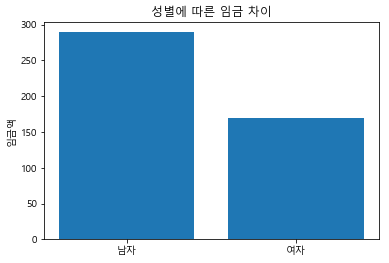

In [163]:
# 성별에 따른 임금 차이 시각화
X = gender_group.index
Y = gender_group['일한달의 월 평균 임금']
plt.title('성별에 따른 임금 차이')
plt.bar(X, Y)
plt.ylabel('임금액')
plt.show()

### [실습2] 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 연도, 월급에 대한 컬럼 추출, 나이를 계산해 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이에 따른 급여 평균)
- 데이터 시각화

In [164]:
# 나이를 계산해 파생변수 추가
data['나이(만)'] = 2020 - data['태어난 연도']
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이(만)
0,2,1936,2,2,NaN,NaN,1,84
1,2,1945,2,2,NaN,NaN,1,75
2,1,1948,2,2,NaN,NaN,1,72
3,1,1942,3,1,762.0,108.9,1,78
4,2,1923,2,1,NaN,NaN,1,97


In [165]:
# 태어난 연도, 월급, 나이 컬럼 추출
data_parse = data[['태어난 연도', '일한달의 월 평균 임금', '나이(만)']]

In [166]:
# 결측값 확인
data_parse.isna().sum()

태어난 연도              0
일한달의 월 평균 임금    10915
나이(만)               0
dtype: int64

In [167]:
# 임금 이상치 결측값 처리
for idx in outlier.index :
    #print(idx)
    data_parse.loc[idx, '일한달의 월 평균 임금'] = np.nan
data_parse.head()

,태어난 연도,일한달의 월 평균 임금,나이(만)
0,1936,NaN,84
1,1945,NaN,75
2,1948,NaN,72
3,1942,108.9,78
4,1923,NaN,97


In [168]:
# 결측값 제거
age_wage = data_parse.dropna()

In [169]:
# 나이에 따른 급여 평균
age_group_mean = age_wage[['나이(만)', '일한달의 월 평균 임금']].groupby('나이(만)').mean()
age_group_mean.head()

,일한달의 월 평균 임금
나이(만),
22,89.333333
23,136.720000
24,140.807692
25,138.000000
26,145.652000


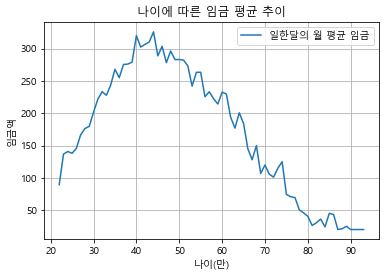

In [170]:
# 데이터 시각화
age_group_mean.plot()
plt.title('나이에 따른 임금 평균 추이')
plt.ylabel('임금액')
plt.grid()
plt.show()

### [실습 + a]
- 연령대에 따른 분포
- 연령대별 평균 급여 변화
- 성별과 연령대 분포
- 성별과 연령대에 따른 평균 급여 변화
- 지역별 연령층 분포와 연령층별 지역 비율

In [171]:
# 연령대 분포 분석
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이(만)
0,2,1936,2,2,NaN,NaN,1,84
1,2,1945,2,2,NaN,NaN,1,75
2,1,1948,2,2,NaN,NaN,1,72
3,1,1942,3,1,762.0,108.9,1,78
4,2,1923,2,1,NaN,NaN,1,97


In [172]:
# 현재 시점 출력 함수
dt.datetime.now()

datetime.datetime(2020, 10, 21, 10, 39, 19, 593545)

In [173]:
data['나이'] = data['나이(만)'] + 1
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이(만),나이
0,2,1936,2,2,NaN,NaN,1,84,85
1,2,1945,2,2,NaN,NaN,1,75,76
2,1,1948,2,2,NaN,NaN,1,72,73
3,1,1942,3,1,762.0,108.9,1,78,79
4,2,1923,2,1,NaN,NaN,1,97,98


In [174]:
# 연령대 분석 위한 파생변수 추가
data['연령대'] = (data['나이'] // 10) *10
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이(만),나이,연령대
0,2,1936,2,2,NaN,NaN,1,84,85,80
1,2,1945,2,2,NaN,NaN,1,75,76,70
2,1,1948,2,2,NaN,NaN,1,72,73,70
3,1,1942,3,1,762.0,108.9,1,78,79,70
4,2,1923,2,1,NaN,NaN,1,97,98,90


In [175]:
# 연령대 분석 위한 컬럼 추출
year_df = data[['태어난 연도', '나이', '연령대']]
year_df.head()

,태어난 연도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90


In [176]:
# 결측값 확인 및 정제
year_df.isna().sum()

태어난 연도    0
나이        0
연령대       0
dtype: int64

In [177]:
# 연령대에 대한 빈도수 확인
age_gen_df = year_df.filter(['나이', '연령대']).groupby('연령대').count() #데이터 프레임은 count(), 시리즈 형식은 value_counts() 사용
age_gen_df

# 형식 차이
year_df['연령대'].value_counts() #시리즈 형식은 value_counts()
year_df.filter(['연령대']).count() #데이터 프레임 형식은 count()

# 정렬
age_gen_df2 = pd.DataFrame(year_df['연령대'].value_counts())
age_gen_df2.sort_index(inplace=True)
age_gen_df2

,연령대
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148
90,386


In [178]:
# rename(columns = { : })
# 인덱스 수정
reIndex = {}
for idx in list(age_gen_df2.index) :
    reIndex[idx] = '%d대'% idx
#reIndex
age_gen_df2.rename(index=reIndex, inplace=True)
age_gen_df2

,연령대
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


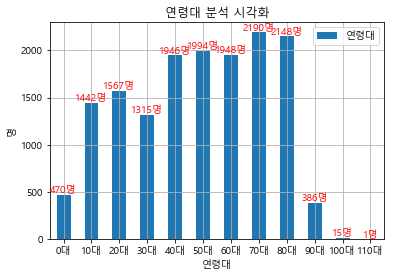

In [179]:
# 시각화 bar()

age_gen_df2.plot.bar(rot=0)
plt.grid()
plt.title('연령대 분석 시각화')
plt.xlabel('연령대')
plt.ylabel('명')

for idx, value in enumerate(list(age_gen_df2['연령대'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, 
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10,
             color='red')

plt.show()

In [307]:
# 연령대별 평균 급여 변화
gen_wage = data[['연령대', '일한달의 월 평균 임금']]
gen_wage.head()

,연령대,일한달의 월 평균 임금
0,80,NaN
1,70,NaN
2,70,NaN
3,70,108.9
4,90,NaN


In [181]:
# 임금 이상치 결측값 처리
for idx in outlier.index :
    #print(idx)
    gen_wage.loc[idx, '일한달의 월 평균 임금'] = np.nan
gen_wage.head()

,연령대,일한달의 월 평균 임금
0,80,NaN
1,70,NaN
2,70,NaN
3,70,108.9
4,90,NaN


In [182]:
# 결측값 확인
gen_wage.isna().sum()
# 결측치 제거
gen_wage_df2 = gen_wage.dropna()

In [183]:
# 결측값 확인
gen_wage_df2.isna().sum()

연령대             0
일한달의 월 평균 임금    0
dtype: int64

In [184]:
# 연령대별 임금 평균
gen_group_wage = gen_wage_df2.groupby('연령대').mean()
gen_group_wage

,일한달의 월 평균 임금
연령대,
20,154.890476
30,240.025899
40,300.876333
50,260.645143
60,191.040312
70,94.149102
80,35.000000
90,22.000000


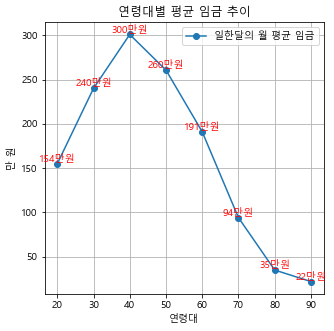

In [365]:
# 데이터 시각화

gen_group_wage.plot(marker='o')
plt.rcParams['figure.figsize'] = (5, 5)
plt.grid()


for idx, value in enumerate(list(gen_group_wage['일한달의 월 평균 임금'])) : # enumerate() : 인덱스와 값을 함께 출력해준다.
    txt = '%d만원' % value
    x = gen_group_wage.index[idx]
    plt.text(x, value, txt, # plt.text(x, y, 그래프에 넣어주고자 하는 text)
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10,
             color='red')

plt.title('연령대별 평균 임금 추이')
plt.ylabel('만 원')

plt.show()

In [233]:
# 성별과 연령대 분포 분석하고 시각화 실습
gender_year_dist_df = data.filter(['성별', '태어난 연도'])
gender_year_dist_df.head()

,성별,태어난 연도
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923


In [234]:
# 성별값을 남자, 여자로 변환 (파생변수 X)
gender_year_dist_df['성별'] = np.where(gender_year_dist_df['성별'] == 1, '남자', '여자')
gender_year_dist_df.head()

,성별,태어난 연도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923


In [235]:
# 연령대 계산해 파생변수 추가
gender_year_dist_df['연령대'] = (data['나이'] // 10) *10

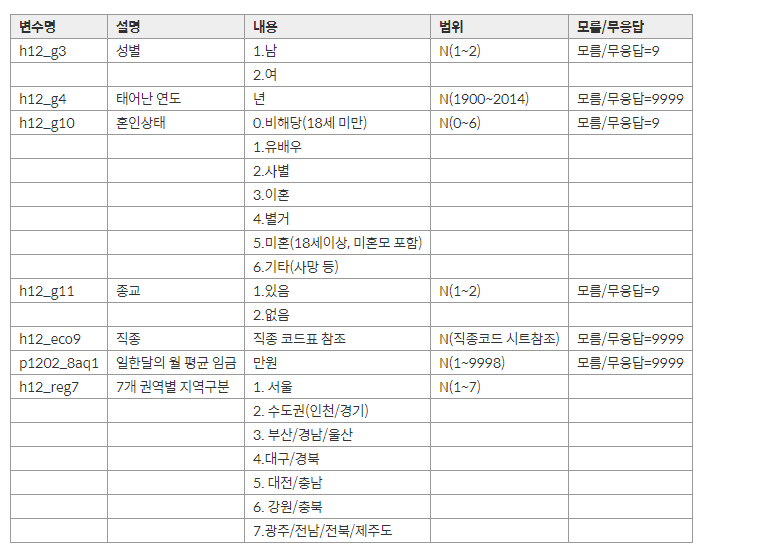

In [236]:
from IPython.display import Image
Image('C:/Users/i/data/koweps_img.png', width = 700)

In [237]:
# 데이터 정제 : 결측값 확인
gender_year_dist_df.isna().sum()

성별        0
태어난 연도    0
연령대       0
dtype: int64

In [244]:
# 데이터 정제 : 성별 이상치 확인
gender_year_dist_df['성별'].value_counts()

여자    8440
남자    6982
Name: 성별, dtype: int64

In [250]:
# 데이터 정제 : 태어난 연도 이상치 확인
gender_year_dist_df['태어난 연도'].value_counts().index.sort_values()

Int64Index([1907, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=101)

In [256]:
# 이상치 제거 (태어난 연도 > 2014)
year_outlier = gender_year_dist_df[gender_year_dist_df['태어난 연도'] > 2014]

for idx in year_outlier.index :
    #print(idx)
    gender_year_dist_df.loc[idx, '태어난 연도'] = np.nan

,성별,태어난 연도,연령대
0,여자,1936.0,80
1,여자,1945.0,70
2,남자,1948.0,70
3,남자,1942.0,70
4,여자,1923.0,90


In [257]:
# 결측치 확인
gender_year_dist_df.isna().sum()

성별          0
태어난 연도    134
연령대         0
dtype: int64

In [259]:
#결측치 제거
gen_year_dist_df = gender_year_dist_df.dropna()
gen_year_dist_df.isna().sum()

성별        0
태어난 연도    0
연령대       0
dtype: int64

In [272]:
# 데이터 분석
# 성별과 연령대별로 빈도수 계산
gender_gen_dist_df = gen_year_dist_df.groupby(['성별', '연령대'], as_index=False).count()
display(gender_gen_dist_df)
gender_gen_dist_df = gender_gen_dist_df.rename(columns={'태어난 연도':'명'})
print("*"*50)
display(gender_gen_dist_df)

,성별,연령대,태어난 연도
0,남자,0,163
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


**************************************************


,성별,연령대,명
0,남자,0,163
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


In [275]:
# 성별이 컬럼, 연령대가 인덱스로 사용되고 인원 수가 데이터 배치되도록 피봇 구성
gender_gen_dist_pivot = gender_gen_dist_df.pivot('연령대', '성별', '명')
display(gender_gen_dist_pivot)

# 필요에 따라 인덱스 이름 변경
age_index_rename = {}
for idx in list(gender_gen_dist_pivot.index) :
    age_index_rename[idx] = '%d대' % idx
display( age_index_rename )
gender_gen_dist_pivot.rename(index=age_index_rename, inplace=True)
print("*"*50)
display(gender_gen_dist_pivot)

성별,남자,여자
연령대,,
0,163.0,173.0
10,732.0,710.0
20,710.0,857.0
30,636.0,679.0
40,981.0,965.0
50,1004.0,990.0
60,888.0,1060.0
70,834.0,1356.0
80,820.0,1328.0


{0: '0대',
 10: '10대',
 20: '20대',
 30: '30대',
 40: '40대',
 50: '50대',
 60: '60대',
 70: '70대',
 80: '80대',
 90: '90대',
 100: '100대',
 110: '110대'}

**************************************************


성별,남자,여자
연령대,,
0대,163.0,173.0
10대,732.0,710.0
20대,710.0,857.0
30대,636.0,679.0
40대,981.0,965.0
50대,1004.0,990.0
60대,888.0,1060.0
70대,834.0,1356.0
80대,820.0,1328.0


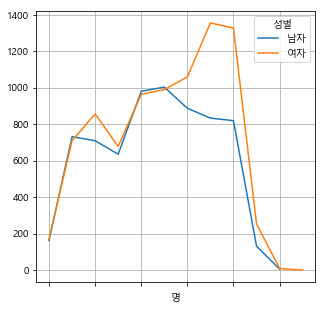

In [290]:
# 시각화
gender_gen_dist_pivot.plot()
plt.xlabel('연령대')
plt.xlabel('명')
plt.grid()
plt.show()

In [318]:
# 지역별 연령층 분포와 연령층별 지역 비율
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이(만),나이,연령대
0,2,1936,2,2,NaN,NaN,1,84,85,80
1,2,1945,2,2,NaN,NaN,1,75,76,70
2,1,1948,2,2,NaN,NaN,1,72,73,70
3,1,1942,3,1,762.0,108.9,1,78,79,70
4,2,1923,2,1,NaN,NaN,1,97,98,90


In [319]:
region_age_df = data.filter(['태어난 연도', '7개 권역별 지역구분'])
region_age_df.head()

,태어난 연도,7개 권역별 지역구분
0,1936,1
1,1945,1
2,1948,1
3,1942,1
4,1923,1


In [320]:
# '나이' 파생변수 추가하고
# '태어난 연도' 컬럼 제거 
region_age_df['나이'] = dt.datetime.now().year - region_age_df['태어난 연도'] + 1
region_age_df['나이'].head()

region_age_df.drop('태어난 연도', axis=1, inplace=True)
region_age_df.head()

,7개 권역별 지역구분,나이
0,1,85
1,1,76
2,1,73
3,1,79
4,1,98


In [321]:
# 지역코드와 매칭되는 데이터프레임을 만들어 병합
region_code_df = pd.DataFrame({  
    '지역코드' : list(range(1,8)) , 
    '지역명'   : ['서울', '수도권(인천/경기)', '부산/경남/울산', '대구/경북', '대전/충남', '강원/충북', '광주/전남/전북/제주도']
})
region_code_df

,지역코드,지역명
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [322]:
# 데이터프레임 병합

region_age_code_df = pd.merge(region_age_df, region_code_df, left_on='7개 권역별 지역구분', right_on = '지역코드', how='outer')
region_age_code_df.drop('7개 권역별 지역구분', axis=1, inplace=True)
region_age_code_df.head()

,나이,지역코드,지역명
0,85,1,서울
1,76,1,서울
2,73,1,서울
3,79,1,서울
4,98,1,서울


In [323]:
# 데이터 분석
# 연령층은 나이 구간을 설정 나이 < 30 : 청년층 , 나이 < 60 : 중년층 , 그렇지 않으면 노년층
# '연령층' 이라는 파생변수 추가

def age(x):
    c = ''
    if x < 30 :
        c = '청년층'
    elif x < 60 :
        c = '중년층'
    else :
        c = '노년층'
    return c
region_age_code_df['연령층'] = region_age_code_df['나이'].apply(lambda x : age(x))
display(region_age_code_df.head())

,나이,지역코드,지역명,연령층
0,85,1,서울,노년층
1,76,1,서울,노년층
2,73,1,서울,노년층
3,79,1,서울,노년층
4,98,1,서울,노년층


In [324]:
# case 연구 2)
# np.select(list, list, default) -> 1차원 , series
condition01 = [(region_age_code_df['나이'] < 30) ,
               (region_age_code_df['나이'] < 60) ,
               (region_age_code_df['나이'] >= 60)]
condition02 = ['청년층', '중년층', '노년층']
region_age_code_df['연령층'] = np.select(condition01, condition02)
display(region_age_code_df.head())

,나이,지역코드,지역명,연령층
0,85,1,서울,노년층
1,76,1,서울,노년층
2,73,1,서울,노년층
3,79,1,서울,노년층
4,98,1,서울,노년층


In [340]:
# 지역과 연령층에 대한 빈도 분포 확인
region_gen_group = region_age_code_df.groupby(['지역명', '연령층'] , as_index=False).count() # as_index=False를 주면 인덱스가 그룹화되지 않고, 각 컬럼으로 떨어진다.
region_gen_group.drop('지역코드', axis=1, inplace=True)
region_gen_group.rename(columns={'나이':'인원'} , inplace=True)
display(region_gen_group)

,지역명,연령층,인원
0,강원/충북,노년층,567
1,강원/충북,중년층,361
2,강원/충북,청년층,252
3,광주/전남/전북/제주도,노년층,1283
4,광주/전남/전북/제주도,중년층,867
5,광주/전남/전북/제주도,청년층,599
6,대구/경북,노년층,973
7,대구/경북,중년층,537
8,대구/경북,청년층,364
9,대전/충남,노년층,591


In [341]:
# 분석 결과를 pivot 으로 구성
# 지역을 인덱스, 인덱스 연령층을 컬럼으로, 나이를 값으로 구성

region_gen_pivot = region_gen_group.pivot('지역명', '연령층', '인원') #pivot(행, 컬럼, 값)
display(region_gen_pivot)



연령층,노년층,중년층,청년층
지역명,,,
강원/충북,567,361,252
광주/전남/전북/제주도,1283,867,599
대구/경북,973,537,364
대전/충남,591,443,321
부산/경남/울산,1189,844,531
서울,858,868,482
수도권(인천/경기),1227,1335,930


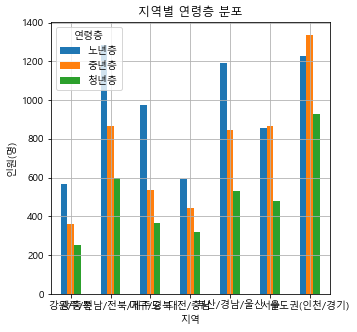

In [346]:
# 데이터 시각화 , bar plot

region_gen_pivot.plot.bar(rot=0)
plt.title('지역별 연령층 분포')
plt.grid()
plt.xlabel('지역')
plt.ylabel('인원(명)')

plt.show()

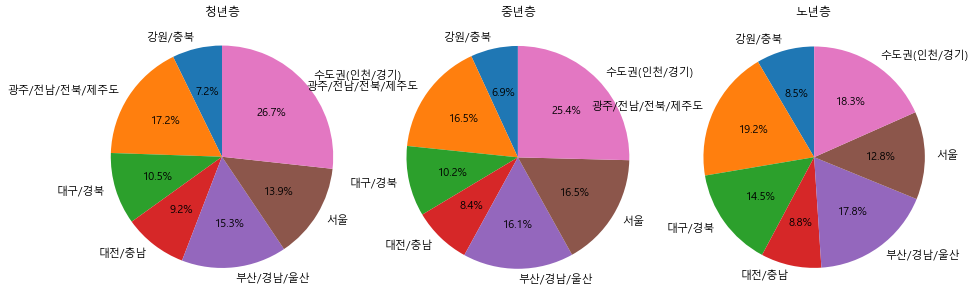

In [382]:
# 데이터 시각화, pie chart
# 연령층별 pie chart

# 그래프의 밑바탕(캔버스)를 그리는 작업
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 5)
area01 = fig.add_subplot(1,3,1)
area02 = fig.add_subplot(1,3,2)
area03 = fig.add_subplot(1,3,3)

region_gen_pivot['청년층'].plot.pie(ax=area01, autopct='%0.1f%%', startangle=90, fontsize=11) # ax= 영역 지정
area01.title.set_text('청년층')
area01.set(ylabel="")
area01.axis('equal')

region_gen_pivot['중년층'].plot.pie(ax=area02, autopct='%0.1f%%', startangle=90, fontsize=11) 
area02.title.set_text('중년층')
area02.set(ylabel="")
area02.axis('equal')

region_gen_pivot['노년층'].plot.pie(ax=area03, autopct='%0.1f%%', startangle=90, fontsize=11)
area03.title.set_text('노년층')
area03.set(ylabel="")
area03.axis('equal')
plt.show()